House Price prediction Model using Python

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data =pd.read_csv("housing.csv")
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


.info is used to check if rows have null or empty values

.dropna is used to remove rows with null entries in the data
while inplace is used to replace previous dataset with this new data without re-assigning

In [9]:
data.dropna(inplace=True)
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


Now we want to split the data into training and test data.
X is the dataframe without the target variable, so it will be removed, .drop is used to remove a feature, here it is the 'median_house_value' which should be our y.

y = data['median_house_value'] or y = data.median_house_value is valid

In [11]:
from sklearn.model_selection import train_test_split

X = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


Now the splitting

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

train_data = X_train.join(y_train)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
11713,-120.15,39.15,25.0,1669.0,348.0,163.0,78.0,5.7500,INLAND,176600.0
7677,-118.09,33.92,33.0,879.0,181.0,547.0,169.0,5.3146,<1H OCEAN,168600.0
7949,-118.14,33.87,44.0,1607.0,271.0,799.0,283.0,5.0840,<1H OCEAN,214100.0
17559,-121.88,37.32,30.0,1242.0,338.0,1438.0,325.0,2.6607,<1H OCEAN,169300.0
18738,-122.35,40.56,12.0,3900.0,863.0,2145.0,864.0,1.9881,INLAND,85200.0
...,...,...,...,...,...,...,...,...,...,...
18700,-122.34,40.58,7.0,4843.0,992.0,2223.0,932.0,3.0549,INLAND,101700.0
10261,-117.85,33.88,14.0,4753.0,681.0,2138.0,678.0,7.3658,<1H OCEAN,288500.0
2772,-115.96,33.30,27.0,322.0,81.0,112.0,57.0,1.1250,INLAND,54400.0
9100,-117.92,34.59,7.0,681.0,125.0,485.0,104.0,2.7396,INLAND,125600.0


Matplotlib is building the font cache; this may take a moment.


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

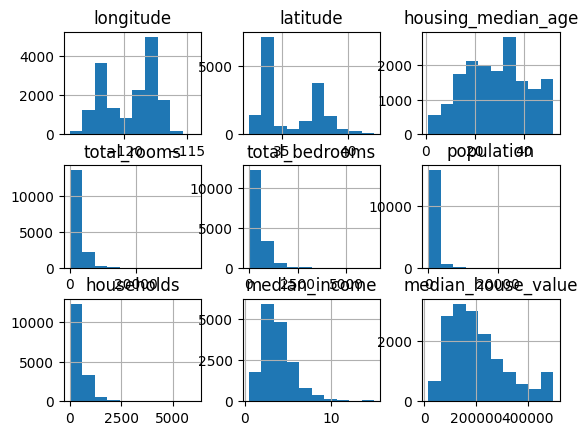

In [13]:
train_data.hist(figsize=(15, 8))

In [17]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

ValueError: could not convert string to float: 'INLAND'

Because some data are skewed, we add log to them to make them more Gaussian

In [19]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

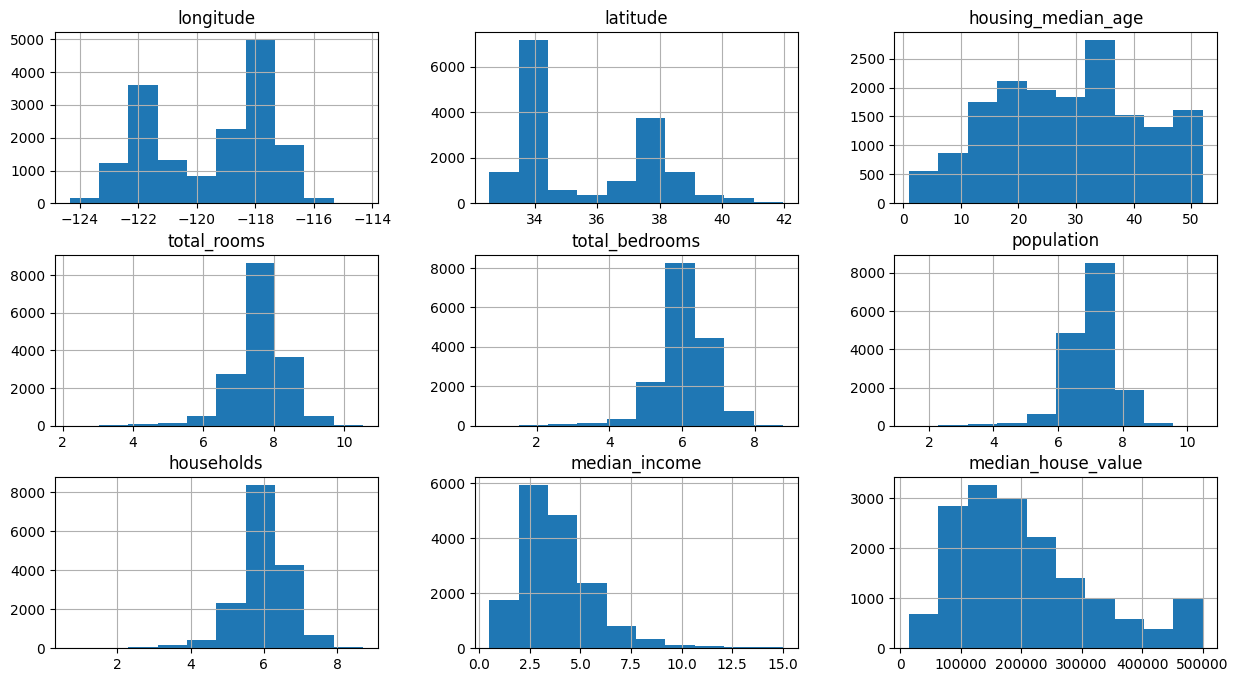

In [20]:
train_data.hist(figsize=(15, 8))

pd.get_dummies is used for one-hot encoding, here we're trying to encode ocean proximity, we then add the encoded feature to the dataset using .join, then remove ocean proximity using .drop

In [26]:

train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis =1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
11713,-120.15,39.15,25.0,7.420579,5.855072,5.099866,4.369448,5.7500,176600.0,False,True,False,False,False
7677,-118.09,33.92,33.0,6.779922,5.204007,6.306275,5.135798,5.3146,168600.0,True,False,False,False,False
7949,-118.14,33.87,44.0,7.382746,5.605802,6.684612,5.648974,5.0840,214100.0,True,False,False,False,False
17559,-121.88,37.32,30.0,7.125283,5.826000,7.271704,5.786897,2.6607,169300.0,True,False,False,False,False
18738,-122.35,40.56,12.0,8.268988,6.761573,7.671361,6.762730,1.9881,85200.0,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18700,-122.34,40.58,7.0,8.485496,6.900731,7.707063,6.838405,3.0549,101700.0,False,True,False,False,False
10261,-117.85,33.88,14.0,8.466742,6.525030,7.668094,6.520621,7.3658,288500.0,True,False,False,False,False
2772,-115.96,33.30,27.0,5.777652,4.406719,4.727388,4.060443,1.1250,54400.0,False,True,False,False,False
9100,-117.92,34.59,7.0,6.525030,4.836282,6.186209,4.653960,2.7396,125600.0,False,True,False,False,False


In [30]:
plt.figure(figsize=(15, 8))
# sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

In [32]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x='latitude', y='longitude', data=train_data, hue='median_house_value', palette"coolwarm")

SyntaxError: positional argument follows keyword argument (2610279537.py, line 2)